--to install packages, in anaconda console run these commands...

conda create -n gpd python=3.9
conda activate gpd
conda install --channel conda-forge geopandas
pip install basemap
pip install contextily

--then run script from gpd environmet

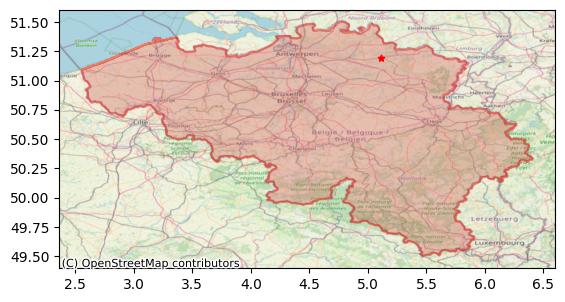

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

long =[5.1147775, 5.1147766]
lat = [51.1907878, 51.1907641]
geometry = [Point(xy) for xy in zip(long,lat)]


wardlink = "BEL_data_shapefile/BEL_adm0.shp"

ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

ward.crs = "epsg:4326"
geo_df.crs = "epsg:4326"

# plot the polygon
ax = ward.plot(alpha=0.35, color='#d66058', zorder=1)
# plot the boundary only (without fill), just uncomment
#ax = gpd.GeoSeries(ward.to_crs(epsg=3857)['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi', zorder=3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()